### Метод Ньютона

Задание

1. Ответить на все вопросы в скрипте
2. Изменить код метода Ньютона так, чтобы он смог разрешать все проблемные случаи, возникающие в скрипте, продемонстрировать это, объяснить почему модификация решает проблему. Проблемы - нулевая производная, кратные корни, биения. Для кратных корней надо так модифицировать метод, чтобы порядок оставался вторым и продемонстрировать это.

ВАЖНО! 
1. Модифицированный метод Ньютона должен получаться путем добавления новых строчек в simple_newton, а не переписыванием его с нуля. Новые строчки надо прокомментировать, зачем они были добавлены.
2. Для каждого нелинейного, где есть указанные проблемы, надо привести демонстрацию решения вашим методом. Без этой демонстрации считается, что обработчик соответствующей проблемы не реализован и не оценивается.

In [71]:
# Простая реализация Метода Ньютона

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def simple_newton(func, dfunc, x, tol = 1e-12):
    sol       = 0
    iteration = 0
    dxs       = []
    
    for i in range(30):
        iteration += 1
        dx = -func(x)/dfunc(x)
        dxs.append(abs(dx))
        x = x + dx
        print(x)
        
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
        
    sol = float('NaN')
    print('More then 30 iterations!')
    return [sol, iteration]

In [ ]:
# Модифицированная реализация Метода Ньютона

MAX_ITERATIONS = 30
MAX_OFFSET     = 0.1
EPS            = 1e-12
DELTA          = 1e-6

def newton(func, dfunc, x, m = 1, tol = EPS):
    sol        = 0
    iteration  = 0
    dxs        = []
    
    for i in range(MAX_ITERATIONS):
        iteration += 1

        if abs(dfunc(x)) < EPS:
            print(f"Производная близка к нулю при (x = {x}). Смещаем точку... \n")
            x += np.random.uniform(-MAX_OFFSET, MAX_OFFSET)

        dx = -m * func(x)/dfunc(x)
        dxs.append(abs(dx))
        x = x + dx
        print(x)
        
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
        
    sol = float('NaN')
    print(f"Error! More then {MAX_ITERATIONS} iterations!")
    return [sol, iteration]

def plot_convergence_graph(dxs):
    dxs_length = len(dxs)
    plt.plot([np.log(dxs[i]) for i in range(dxs_length - 1)], [np.log(dxs[i+1]) for i in range(dxs_length - 1)], marker='o')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('График порядка сходимости')
    plt.grid(True)
    plt.show()

#### Нелинейное уравнение 1

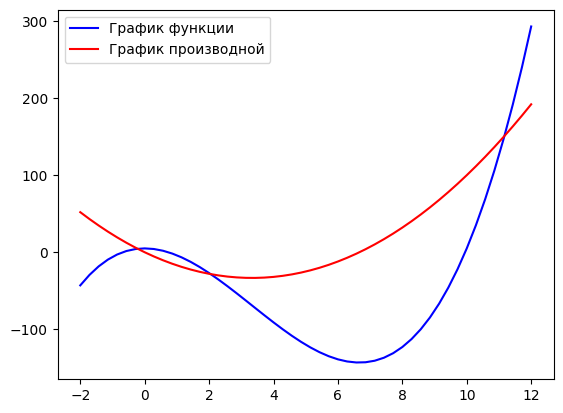

In [73]:
x = np.linspace(-2, 12)

func0  = lambda x: x**3 - 10 * (x**2) + 5
dfunc0 = lambda x: 3 * (x**2) - 20 * x

y_1 = func0(x)
y_2 = dfunc0(x)

plt.plot(x, y_1, label = 'График функции',     color = 'blue')
plt.plot(x, y_2, label = 'График производной', color = 'red')

plt.legend()

1. Объяснить, почему различаются результаты в случае 1 и 2
2. Объяснить, что происходит в случае 3
3. Построить график порядка сходимости от номера итерации. Объяснить результат

####### ПЕРВЫЙ СЛУЧАЙ #######
11.84375
10.410569950043268
9.987255214443813
9.949776654936752
9.949491074435029
9.949491057914386
9.949491057914388
sol =  9.949491057914388
iter =  7
###########################



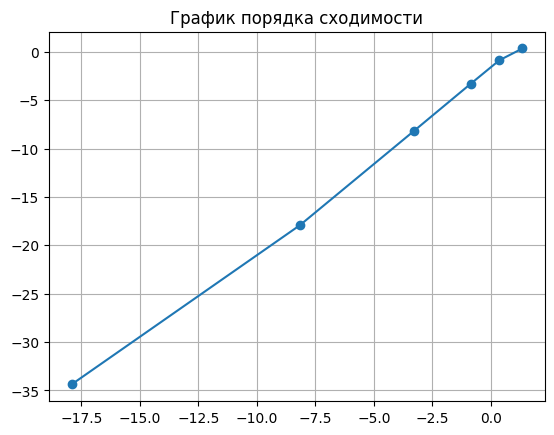

######## ВТОРОЙ СЛУЧАЙ ########
0.7353551476456505
0.7346038443389288
0.7346035077893709
0.7346035077893033
sol =  0.7346035077893033
iter =  4
#############################



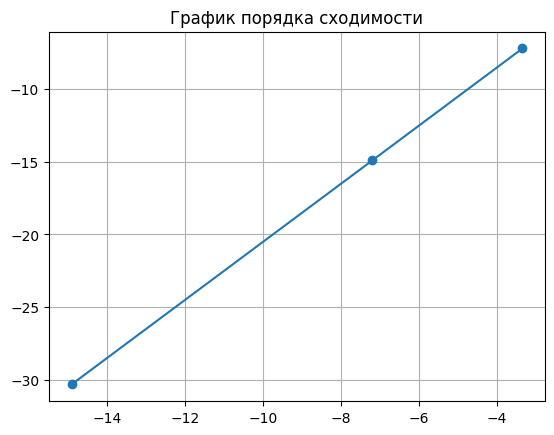

In [74]:
print("####### ПЕРВЫЙ СЛУЧАЙ #######")
data = simple_newton(func0, dfunc0, 8)
print('sol = ',  data[0])
print('iter = ', data[1])
print("###########################\n")

plot_convergence_graph(data[2])

print("######## ВТОРОЙ СЛУЧАЙ ########")
data = simple_newton(func0, dfunc0, 0.7)
print('sol = ',  data[0])
print('iter = ', data[1])
print("#############################\n")

plot_convergence_graph(data[2])

# print("######## ТРЕТИЙ СЛУЧАЙ ########")
# data = simple_newton(func0, dfunc0, 0.0)
# print('sol = ',  data[0])
# print('iter = ', data[1])
# print("#############################\n")

In [75]:
print("####### MODIFIED NEWTON #######\n")

print("######## ТРЕТИЙ СЛУЧАЙ ########")
data = newton(func0, dfunc0, 0.0)
print('sol = ',  data[0])
print('iter = ', data[1])
print("#############################\n")

plot_convergence_graph(data[2])

####### MODIFIED NEWTON #######

######## ТРЕТИЙ СЛУЧАЙ ########
Производная близка к нулю при (x = 0.0). Смещаем точку... 



TypeError: unsupported operand type(s) for +=: 'function' and 'float'

**Ответы.**

1. 

2. В третьем случае начальная точка выбрана в районе, где производная близка к нулю. Это вызывает проблему, так как метода Ньютона включает деление на производную. В результате возникает ошибка ***ZeroDivisionError***.

3. 

#### Нелинейное уравнение 2

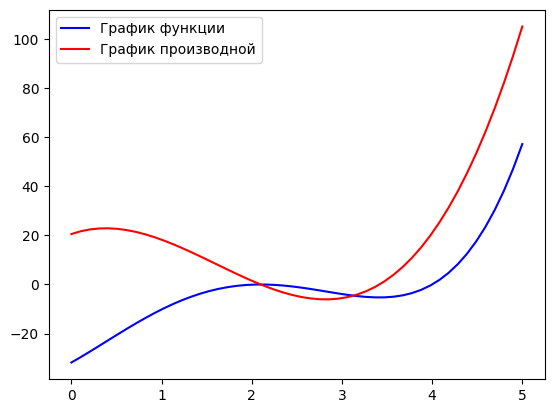

In [ ]:
x = np.linspace(0,5)

func1  = lambda x: x**4 - 6.4 * (x**3) + 6.45 * (x**2) + 20.538 * x - 31.752 # double root (x = 2.1)
dfunc1 = lambda x: 4.0 * (x**3) - 19.2 * (x**2) + 12.9 * x + 20.538


y_1 = func1(x)
y_2 = dfunc1(x)

plt.plot(x, y_1, label = 'График функции',     color = 'blue')
plt.plot(x, y_2, label = 'График производной', color = 'red')

plt.legend()

1. Построить график порядка сходимости от номера итерации. Объяснить результат

2.0494148244473345
2.0745466648340103
2.087231156308758
2.09360477244035
2.0967996512082383
2.0983991375965405
2.0991993962616493
2.0995996549295097
2.0997998166574066
2.0998999056242837
2.099949952137844
2.0999749758949284
2.0999874878778875
2.099993743933325
2.0999968719948967
2.099998435869345
2.099999217972918
2.0999996085075043
2.09999980322977
2.0999999067848725
2.0999999530760354
2.0999999786199406
2.0999999786199406
sol =  2.0999999786199406
iter =  23


C:\Users\d.r.tikhonov\AppData\Local\Temp\ipykernel_229856\547921319.py:34: RuntimeWarning: divide by zero encountered in log
  plt.plot([np.log(dxs[i]) for i in range(dxs_length - 1)], [np.log(dxs[i+1]) for i in range(dxs_length - 1)], marker='o')


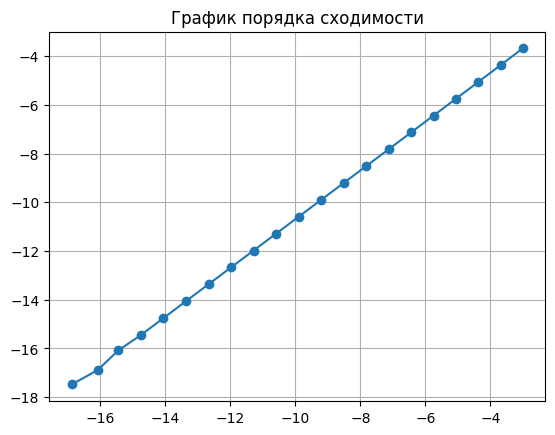

In [ ]:
data = simple_newton(func1, dfunc1, 2.0)
print('sol = ',  data[0])
print('iter = ', data[1])

plot_convergence_graph(data[2])

2.098829648894669
2.099999815455281
2.1000000025117975
2.100000193390415
2.100000000014807
2.100000000014807
sol =  2.100000000014807
iter =  6


C:\Users\d.r.tikhonov\AppData\Local\Temp\ipykernel_229856\547921319.py:34: RuntimeWarning: divide by zero encountered in log
  plt.plot([np.log(dxs[i]) for i in range(dxs_length - 1)], [np.log(dxs[i+1]) for i in range(dxs_length - 1)], marker='o')


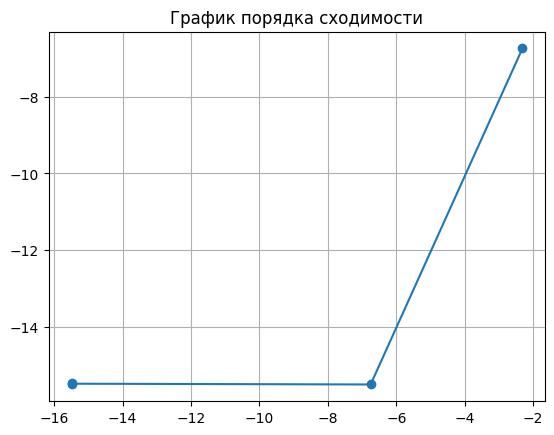

In [ ]:
data = newton(func1, dfunc1, 2.0, 2)
print('sol = ',  data[0])
print('iter = ', data[1])

plot_convergence_graph(data[2])

#### Нелинейное уравнение 3

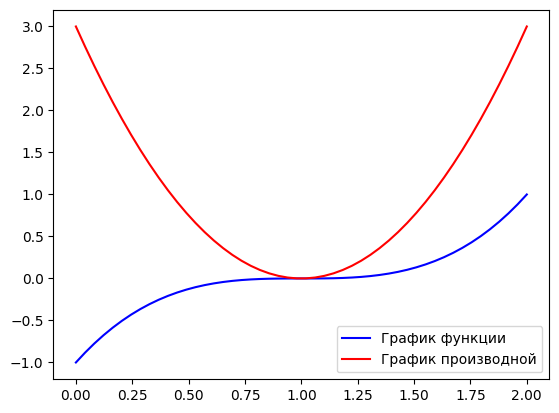

In [ ]:
x = np.linspace(0,2)

func2  = lambda x: (x - 1)**3
dfunc2 = lambda x: 3 * (x - 1)**2


y_1 = func2(x)
y_2 = dfunc2(x)

plt.plot(x, y_1, label = 'График функции',     color = 'blue')
plt.plot(x, y_2, label = 'График производной', color = 'red')

plt.legend()

1. Подобрать начальное приближение и решить задачу

1.0000000666666666
1.0000000444444443
1.0000000296296296
1.0000000197530865
1.0000000131687243
1.0000000087791496
1.0000000058527665
1.0000000039018444
1.0000000026012297
1.000000001734153
1.000000001156102
1.0000000007707348
1.0000000005138232
1.0000000003425489
1.000000000228366
1.000000000152244
1.000000000101496
1.0000000000676639
1.0000000000451092
1.0000000000300728
1.0000000000200486
1.0000000000133658
1.0000000000089104
1.0000000000059404
1.0000000000039602
1.00000000000264
1.0000000000017601
sol =  1.0000000000017601
iter =  27


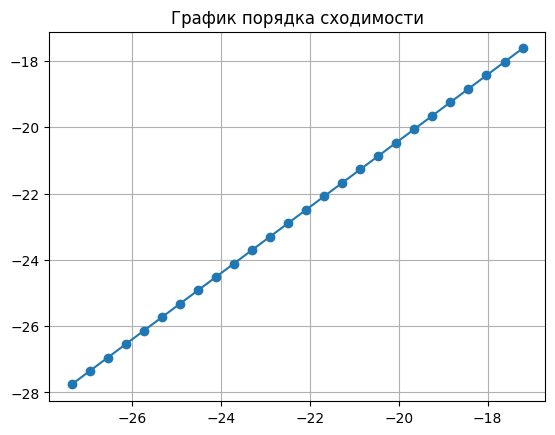

In [ ]:
data = simple_newton(func2, dfunc2, 1.0000001)
print('sol = ',  data[0])
print('iter = ', data[1])

plot_convergence_graph(data[2])

In [ ]:
data = newton(func2, dfunc2, 1.0000001, 1)
print('sol = ',  data[0])
print('iter = ', data[1])

plot_convergence_graph(data[2])

Производная близка к нулю при (x = 1.0000001). Смещаем точку... 

0.9917648467079447
0.9945098978052965
0.9963399318701976
0.9975599545801318
0.9983733030534212
0.9989155353689475
0.9992770235792984
0.9995180157195322
0.9996786771463548
0.9997857847642365
0.9998571898428243
0.9999047932285495
0.999936528819033
0.9999576858793554
0.999971790586237
0.999981193724158
0.9999874624827719
0.9999916416551813
0.9999944277701208
0.9999962851800805
0.999997523453387
0.9999983489689247
0.9999988993126164
0.999999266208411
0.9999995108056073
Производная близка к нулю при (x = 0.9999995108056073). Смещаем точку... 

0.9781465251848777
0.9854310167899184
0.9902873445266123
0.9935248963510749
0.99568326423405
Error! More then 30 iterations!
sol =  nan
iter =  30


IndexError: list index out of range

#### Нелинейное уравнение 4

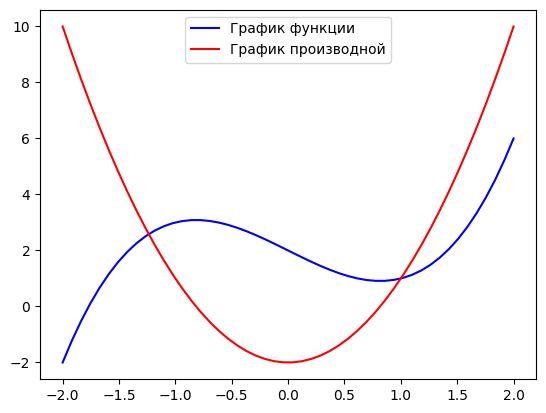

In [ ]:
x = np.linspace(-2,2)
# x = np.linspace(-5,5)

func3  = lambda x: x**3 - 2 * x + 2
dfunc3 = lambda x: 3 * (x**2) - 2

y_1 = func3(x)
y_2 = dfunc3(x)

plt.plot(x, y_1, label = 'График функции',     color = 'blue')
plt.plot(x, y_2, label = 'График производной', color = 'red')

plt.legend()

1. Почему не находится решение во втором случае?

In [ ]:
#data = simple_newton(func3, dfunc3, 0.5) # случай 1
data = simple_newton(func3, dfunc3, 0) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])

1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
More then 30 iterations!
sol =  nan
iter =  30
